# Chapter08 표본분포와 통계적 추정

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'AppleGothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

## 8-1.모집단과 표본

### 모집단 분포와 표본분포

### [실습] 예제 8-1: 모수 구하기 (모평균, 모분산, 모표준편차 )
경부고속도록 서울 요금소~ 부산 구서 나들목에 있는 34개의 나들목 사이의 거리 측정 결과(소수점 셋째자리에서 반올림)

In [8]:

data =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  

# N = np.array(data)
# N.mean()

print(f'a. 모평균   : {round(sum(data)/len(data) , 2)}')
print(f'b. 모분산   : {round(np.var(data, ddof=0) , 2)}')   
print(f'c. 모표준편차: {round(np.std(data, ddof=0) , 2)}')   

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


In [32]:
import pandas as pd

df = pd.read_csv("distance.csv")

# N = df.index()
# N.mean()



### [실습] 예제 8-2 : 표본 통계량 구하기
sample = 7.75, 9.70, 10.86

In [12]:
sample = [7.75, 9.70, 10.86]



print(f'a. 표본평균   : {round(np.mean(sample) , 2)}')
print(f'b. 표본분산   : {round(np.var(sample, ddof=1) , 2)}')   
print(f'c. 표본표준편차: {round(np.std(sample, ddof=1) , 2)}') 

a. 표본평균   : 9.44
b. 표본분산   : 2.47
c. 표본표준편차: 1.57


### 표본평균의 분포 - 균등분포

#### # 경우의 수
n=2인 표본평균의 경우의 수

In [33]:
import itertools

n = 2
result = list(itertools.product(([1,2,3,4]), repeat=n)) # 복원추출
print("**경우의 수 : %s개" % len(result))
print(result)

**경우의 수 : 16개
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]


#### # x_set: 확률변수 상태공간

In [34]:
x_set = [ sum([j for j in i])/n for i in result] 
x_set = list(set(x_set))
x_set.sort()
x_set

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

#### 확률질량함수: f(x)

In [35]:
def f(x):
    cnt = 0
    for i in result:
        if sum([j for j in i])/n == x:
            cnt += 1
    return cnt / (len(result))

#### 확률변수: X

In [36]:
X = [x_set, f]

#### 확률: P(prob)

In [37]:
prob = [f(x_k) for x_k in x_set]
prob

[0.0625, 0.125, 0.1875, 0.25, 0.1875, 0.125, 0.0625]

#### 확률분포표 

In [38]:
import pandas as pd

df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
df.columns.names = ['X_']
df

X_,1.0,1.5,2.0,2.5,3.0,3.5,4.0
P(X_=x_),0.0625,0.125,0.1875,0.25,0.1875,0.125,0.0625


#### 평균의 기대값

In [ ]:
import numpy as np

def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set]) 

E(X)

#### 표본평균의 분산

In [ ]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

V(X)

#### 이항균등분포의 표본평균의 분포 그래프로 나타내기

In [39]:
def get_sample_dist(X, n):
    
    import itertools
    result = list(itertools.product((X), repeat=n)) # 복원추출
    print(f'**경우의 수 : {len(result)}개')
    print(f'**모든 경우 : {result}')


    # 확률변수 상태공간
    x_set = [ sum([j for j in i])/n for i in result] 
    x_set = list(set(x_set))
    x_set.sort()
    print(f'**모든 확률변수 : {x_set}')

    # 확률질량함수
    def f(x):
        cnt = 0
        for i in result:
            if sum([j for j in i])/n == x:
                cnt += 1
        return cnt / (len(result))

    prob = [f(x_k) for x_k in x_set]
    print(f'**모든 확률   : {prob}')


    # 확률분포표
    df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
    df.columns.names = ['X_']
    print(f'**확률분포표:\n/{df}')

    return x_set, prob, df


#### 표본평균의 확률분포 그래프

**경우의 수 : 4개
**모든 경우 : [(1,), (2,), (3,), (4,)]
**모든 확률변수 : [1.0, 2.0, 3.0, 4.0]
**모든 확률   : [0.25, 0.25, 0.25, 0.25]
**확률분포표:
/X_         1.0   2.0   3.0   4.0
P(X_=x_)  0.25  0.25  0.25  0.25
**경우의 수 : 16개
**모든 경우 : [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
**모든 확률변수 : [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
**모든 확률   : [0.0625, 0.125, 0.1875, 0.25, 0.1875, 0.125, 0.0625]
**확률분포표:
/X_           1.0    1.5     2.0   2.5     3.0    3.5     4.0
P(X_=x_)  0.0625  0.125  0.1875  0.25  0.1875  0.125  0.0625
**경우의 수 : 64개
**모든 경우 : [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 1, 1), (3, 1, 2), (3, 1, 3)

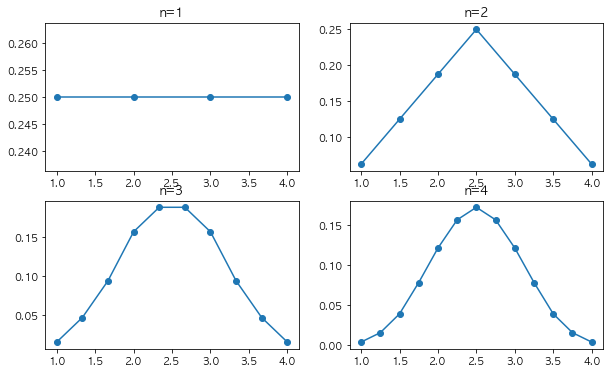

In [40]:
#---------------------
# 그래프로 나타내기 
#---------------------
plt.figure(figsize=(10,6))

X = [1,2,3,4]
for idx, n in enumerate(X): 
    x_set, prob, df = get_sample_dist(X, n)   

    plt.subplot(2, 2, idx+1) 
    plt.plot(x_set, prob, 'o-')
    plt.title(f'n={n}')
    
plt.show() 

### [실습] 예제 8-4 : 표본평균의 분포 및 확률 구하기
$N(178, 16)$인 모집단에서 크기 9인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 180)$ 
- c. $P(176 \le \bar{X} \le 180)$


In [43]:
import scipy.stats as sp
n, std = 178, 4/3

rv = sp.norm(n, std)
print(round(rv.cdf(180), 4))
print(round(rv.cdf(180)-rv.cdf(176), 4))

0.9332
0.8664


#### [실습] $N(166, 9)$인 모집단에서 크기 16인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 164)$ 
- c. $P(164 \le \bar{X} \le 168)$


In [47]:
mu, var, n = 166, 9, 16
std = np.sqrt(var/n)
rv = sp.norm(mu, std)

print(round(rv.cdf(164), 4))
print(round(rv.cdf(168) - rv.cdf(164), 4))




0.0038
0.9923


### [실습] 예제 8-5 : 표본비율의 분포 및 확률 구하기
$p=0.45$인 모집단에서 크기 100인 표본 선정, 표본비율 $ \hat{p}$
- a. $ \hat{p}$ 분포
- b. $P(\hat{p} \le 0.35)$ 
- c. $P(0.41 \le \hat{p} \le 0.51)$

In [53]:
n, p = 100, 0.45
var = (p*(1-p)) / n
std = round(np.sqrt(var), 2)
rv = sp.norm(p, std)

print(round(rv.cdf(0.35), 4))
print(round(rv.cdf(0.51) - rv.cdf(0.41), 4))


0.0228
0.6731


----------------------------------------------------------

## 8-2. 모평균의 추정

### 모평균의 점추정

In [55]:
import numpy as np

data = [17.4, 17.2, 18.1, 17.5, 17.7,
       17.6, 17.5, 17.1, 17.8, 17.6]
N = np.array(data)

print(f'a. 표본평균   :  {round(N.mean() , 4)}')
print(f'a. 표본분산   :  {round(N.var(ddof=1) , 4)}')
print(f'a. 표본표준편차: {round(N.std(ddof=1) , 4)}')

a. 표본평균   :  17.55
a. 표본분산   :  0.0828
a. 표본표준편차: 0.2877


### 모평균의 신뢰구간

#### 모분산이 알려진 정규모집단의 모평균에 대한 신뢰구간

### [실습] 예제 8-7 : 모분산이 알려진 정규모집단의 신뢰구간

In [79]:
Z = {'99%':2.58, '95%': 1.96, '90%': 1.645 }

In [62]:
n, x_, var = 25, 30, 9
print(f'n, x_, var : {n, x_, var}')

a = x_ - Z['95%']*(np.sqrt(var/n))
b =  x_ + Z['95%']*(np.sqrt(var/n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

n, x_, var : (25, 30, 9)
모평균의 신뢰구간 : 28.824 <= mu <= 31.176


#### 모분산이 알려지지 않은 정규모집단의 신뢰구간(근사확률분포)

### [실습] 예제 8-8 : 모분산이 알려지지 않은 정규모집단의 신뢰구간

In [68]:
n , x_, s = 125, 75, 9

a = x_ - Z['95%']*(s/np.sqrt(n))
b = x_ + Z['95%']*(s/np.sqrt(n))
print(f"모평균의 신뢰구간 : {round(a, 2)} <= mu <= {round(b, 2)}")
    
    

모평균의 신뢰구간 : 73.42 <= mu <= 76.58


### [실습] 예제 8-9 : 두 모평균 차의 신뢰구간

In [75]:
n, x_, sigma1 = 56, 261.6, 21.5 
m, y_, sigma2 = 44, 254.4, 14.3
print(f'n, x_, sigma1 : {n, x_, sigma1}')
print(f'm, y_, sigma2 : {m, y_, sigma2}')

a =  (x_-y_) - Z["95%"]*np.sqrt(((sigma1**2)/n + (sigma2**2)/m))
b =  (x_-y_) + Z["95%"]*np.sqrt(((sigma1**2)/n + (sigma2**2)/m))
print(f'두 모평균 차의 신뢰구간 : {round(a,2)} <= x_ - y_ <= {round(b,2)}')

n, x_, sigma1 : (56, 261.6, 21.5)
m, y_, sigma2 : (44, 254.4, 14.3)
두 모평균 차의 신뢰구간 : 0.16 <= x_ - y_ <= 14.24


----------------------------------------------------------

## 8-3. 모비율의 추정

### 모비율의 신뢰구간

### [실습] 예제 8-10 : 모비율의 신뢰구간

In [84]:
Z = {90:1.645, 95:1.96, 99:2.58}

n, p, q =  1200, 580/1200, 1-(580/1200)
print(f'n, p, q : {n, round(p,2), round(q,2)}')

a = p - Z[95]*np.sqrt((p*q)/n)  
b =  p + Z[95]*np.sqrt((p*q)/n)
print(f'모비율의 신뢰구간 : {round(a, 2)} <= p^ <= {round(b, 2)}')

n, p, q : (1200, 0.48, 0.52)
모비율의 신뢰구간 : 0.46 <= p^ <= 0.51


### [실습] 예제 8-11 : 두 모비율 차의 신뢰구간

In [85]:
n, m  = 450, 400 
p1,p2 = 0.04, 0.035
q1,q2 = 0.96, 0.965 
print(f'n, p1, q1 : {n, p1, q1}')
print(f'm, p2, q2 : {n, p2, q2}')

a = (p1 - p2) - Z[95]*np.sqrt((p1*q1)/n + (p2*q2)/m)
b =  (p1 - p2) + Z[95]*np.sqrt((p1*q1)/n + (p2*q2)/m)
print(f'두 모비율 차의 신뢰구간 : {round(a,4)} <= p1-p2 <= {round(b,4)}')

n, p1, q1 : (450, 0.04, 0.96)
m, p2, q2 : (450, 0.035, 0.965)
두 모비율 차의 신뢰구간 : -0.0205 <= p1-p2 <= 0.0305


----------------------------------------------------------

끝